# filter for functional eCLIP peaks only!

- eclip: `~/seqdata/canonical_transcript_binding/_correct/uID_exon_cds.gff3` field 9, Parent=ESNG
- splicing: `~/projects/CELL_LINE/RBP_NAME` has ESNG

In [1]:
import pandas as pd
import os
eclip_bam = pd.read_csv('/home/hsher/projects/peak_calling/ENCODE_FINAL_ANNOTATIONS.uidsonly.txt.manifesthg38.txt', sep = '\t', header= 0, index_col = 0)
outpath = '/home/hsher/seqdata/canonical_transcript_binding/_overlap_splice/'

In [2]:


for uID in eclip_bam.index:
    for ploc in ['exon', 'intron']:
        splicing_file = '/home/hsher/projects/alt_splice/{}/{}'.format(eclip_bam.loc[uID, 'Cell line'], eclip_bam.loc[uID, 'RBP'])
        peak_file = '/home/hsher/seqdata/canonical_transcript_binding/_correct/{}_{}_cds.gff3'.format(uID, ploc)
        out = outpath + str(uID) + '_' + ploc +'.gff3'
        os.system('/home/hsher/projects/ClipNet/scripts/overlap_peak_splicing.sh {} {} {}'.format(splicing_file, peak_file, out))

# only 19 RBP has overlap on gene level :( who are they

In [3]:
non_empty_peaks = [f for f in os.listdir(outpath) if os.stat(os.path.join(outpath, f)).st_size > 0]

In [4]:
len(non_empty_peaks)

18

In [5]:
uids = set([x.split('_')[0] for x in non_empty_peaks])

In [6]:
eclip_bam.loc[uids].sort_values('Cell line') # no overlap hmm

,RBP,Cell line,CLIP_rep1,CLIP_rep2,INPUT
uID,,,,,
631,EFTUD2,HepG2,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...
492,DDX3X,HepG2,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...
228,SF3B4,HepG2,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...
242,U2AF2,K562,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...
480,XRCC6,K562,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...
470,MTPAP,K562,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...
376,SRSF7,K562,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...
439,KHSRP,K562,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...
312,SRSF1,K562,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...


In [7]:
# do other things regulate for example their utrs?
rbp_id = pd.read_pickle('~/projects/peak_calling/RBP_id.pickle')

In [8]:
direct_interactor = eclip_bam.loc[uids, 'RBP']

In [9]:
all_direct_interactor_esnt = set()
rbp_id.loc[direct_interactor, 'esnt']

query
U2AF2     {ENST00000592874, ENST00000587196, ENST0000045...
XRCC6     {ENST00000405878, ENST00000405506, ENST0000042...
MTPAP     {ENST00000488290, ENST00000421701, ENST0000026...
SRSF7     {ENST00000446327, ENST00000452806, ENST0000043...
EFTUD2    {ENST00000587914, ENST00000586654, ENST0000058...
DDX3X     {ENST00000642722, ENST00000647373, ENST0000064...
KHSRP     {ENST00000594745, ENST00000599642, ENST0000059...
SF3B4                    {ENST00000271628, ENST00000457312}
SRSF1     {ENST00000582730, ENST00000583741, ENST0000058...
UCHL5     {ENST00000420791, ENST00000416915, ENST0000036...
AQR       {ENST00000156471, ENST00000560117, ENST0000055...
Name: esnt, dtype: object

In [10]:
three_utr = pd.read_pickle('~/projects/three_utr.pickle')

In [11]:
direct_esnt = []
short_enst = [t.split('.')[0] for t in three_utr.columns]
for rbp in direct_interactor:
     direct_esnt += list(rbp_id.loc[rbp, 'esnt'].intersection(set(short_enst)))

In [12]:
direct_esnt_colname = three_utr.columns[[short_enst.index(esnt) for esnt in direct_esnt]]

In [13]:
# who bind their 3'UTR
UTR3_direct_itxn = three_utr[direct_esnt_colname]

In [14]:
len(direct_interactor)

11

In [15]:
UTR3_direct_itxn.columns = direct_interactor

In [16]:
def merge_cell_line_replicates(df):
    merged_df = pd.DataFrame(columns = df.columns)
    for name, g in eclip_bam.groupby(by = 'RBP'):
        if len(set(g.index).intersection(df.index))== g.shape[0]:
            if g.shape[0] == 1: # only in 1 cell line
                merged_df = merged_df.append(df.loc[g.index], ignore_index = False)
            else:
                
                combined_peak = 1-(1-df.loc[g.index[0]]).multiply(1-df.loc[g.index[1]])
                combined_peak.name = g.index[0]
                #print(df.loc[g['uID']].append(combined_peak))
                merged_df = merged_df.append(combined_peak, ignore_index = False)
    return merged_df

In [17]:
merged_3UTR_direct_itxn = merge_cell_line_replicates(UTR3_direct_itxn)

In [18]:
merged_3UTR_direct_itxn.index = merged_3UTR_direct_itxn.index.map(eclip_bam['RBP'])

In [19]:
merged_3UTR_direct_itxn = merged_3UTR_direct_itxn.loc[(merged_3UTR_direct_itxn.sum(axis = 1)>0) & (~merged_3UTR_direct_itxn.index.isin(direct_interactor)) ]

In [20]:
merged_3UTR_direct_itxn

RBP,U2AF2,XRCC6,MTPAP,SRSF7,EFTUD2,DDX3X,KHSRP,SF3B4,SRSF1,UCHL5,AQR
AKAP1,0,0,0,0,0,0,1,0,0,0,0
AKAP8L,1,0,0,0,0,0,0,0,0,0,0
APOBEC3C,1,0,0,0,0,1,0,1,0,0,0
BCLAF1,0,0,0,0,0,1,0,0,1,0,0
CDC40,1,0,0,0,0,0,0,0,0,0,0
CPEB4,0,0,0,0,0,0,0,0,1,0,0
CPSF6,0,0,0,0,0,0,0,0,1,0,0
CSTF2,0,0,0,1,0,1,0,0,1,0,0
CSTF2T,0,0,0,0,0,1,0,0,1,0,0
DDX55,1,0,0,0,0,1,1,0,0,0,0


In [21]:
# how much can be explained by direct interaction?
# overlap direct and indirect interaction

def overlap_splice(direct, indirect, cell_line):
    ''' calculate overlapping event (gene, event type)'''
    direct_target = pd.read_csv('/home/hsher/projects/alt_splice/{}/{}'.format(cell_line, direct), header = None, sep = '\t')[[3, 15]]
    indirect_target = pd.read_csv('/home/hsher/projects/alt_splice/{}/{}'.format(cell_line, indirect), header = None, sep = '\t')[[3, 15]]
    
    direct_target = set([tuple(r) for r in direct_target.to_numpy()])
    indirect_target = set([tuple(r) for r in indirect_target.to_numpy()])
    
    
    return indirect_target, direct_target.intersection(indirect_target)

In [22]:
def overlap_between(cell_line):
    total_dict = {}
    for indirect in merged_3UTR_direct_itxn.index:
        percent = {}
        for direct in merged_3UTR_direct_itxn.loc[indirect].loc[merged_3UTR_direct_itxn.loc[indirect]>0].index.tolist():
            try:
                total, explained = overlap_splice(direct, indirect, cell_line)
                percent[direct] = len(explained)/len(total)
            except FileNotFoundError:
                pass
        total_dict[indirect] = percent
    return total_dict

In [24]:
total_hep = overlap_between('HepG2')
total_k562 = overlap_between('K562')

In [25]:
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
cm = plt.get_cmap('rainbow')
NUM_COLORS = len(merged_3UTR_direct_itxn.columns)
dir_color = dict(zip(merged_3UTR_direct_itxn.columns,[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]))
legend_elements = [Patch(facecolor=dir_color[direct], edgecolor=dir_color[direct],
                         label=direct) for direct in dir_color.keys()]

In [26]:
import matplotlib.pyplot as plt
import numpy as np
def plot_indirect(total_dicts, cell_line = ['HepG2', 'K562'], sharex = True, sharey = True):
    fig, ax = plt.subplots(1,2, figsize=(10,10))  
    i = 0
    for t in total_dicts:
        ax[i].set_title(cell_line[i])
        ax[i].set_yticks(np.arange(len(t.keys())))
        ax[i].set_yticklabels(list(t.keys()))
        ax[i].set_ylabel('indirect interaction')
        ax[i].set_xlabel('splice event overlap')
        for n,indir in enumerate(t.keys()):
            left = 0
            for dir_ in t[indir].keys():
                ax[i].barh(y = n, width = t[indir][dir_], left = left, color = dir_color[dir_])
                left += t[indir][dir_]
        i+=1
    
    
    
    plt.legend(handles=legend_elements, loc='right', title='direct binder')
    plt.show()

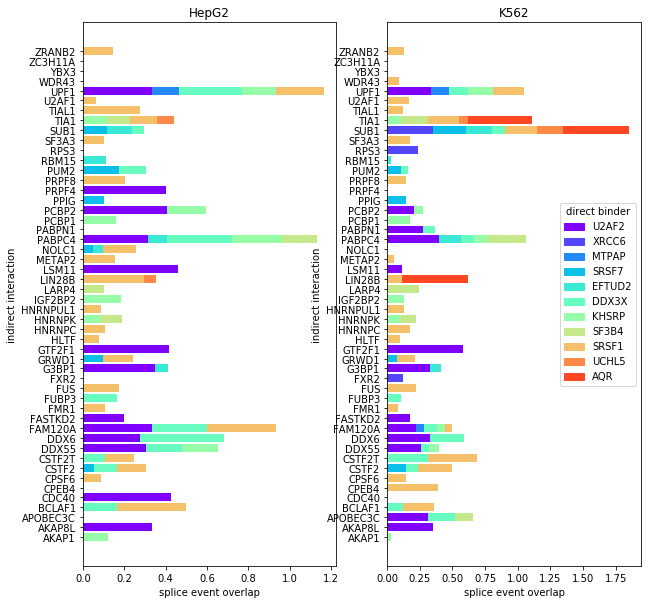

In [27]:
plot_indirect([total_hep, total_k562])

In [28]:
def get_background(cell_line):
    background = []
    for indirect in merged_3UTR_direct_itxn.index:
        for direct in merged_3UTR_direct_itxn.loc[indirect].loc[merged_3UTR_direct_itxn.loc[indirect]==0].index.tolist():
            try:
                total, explained = overlap_splice(direct, indirect, cell_line)
                if len(explained)/len(total) != 1: # some direct also bind UTR
                    background.append(len(explained)/len(total))
            except FileNotFoundError:
                pass
    return background, np.percentile(background, 95)

In [29]:
hep_background, hep_thres = get_background('HepG2')
k562_background, k562_thres = get_background('K562')

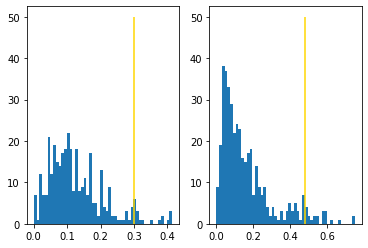

In [30]:
f,ax= plt.subplots(1,2)
ax[0].hist(hep_background, bins = 50)
ax[0].vlines(hep_thres, color = 'gold', ymin = 0, ymax = 50)
ax[1].hist(k562_background, bins = 50)
ax[1].vlines(k562_thres, color = 'gold', ymin = 0, ymax = 50)

In [31]:
def filter_total(total_dict, threshold):
    new = {}
    for indir in total_dict.keys():
        new[indir] = {}
        for dir_ in total_dict[indir].keys():
            if total_dict[indir][dir_] > threshold:
                new[indir][dir_] = total_dict[indir][dir_]
    return new

In [32]:
filter_hep = filter_total(total_hep, hep_thres) # none of them exceed threshold!
filter_k562 = filter_total(total_k562, k562_thres)

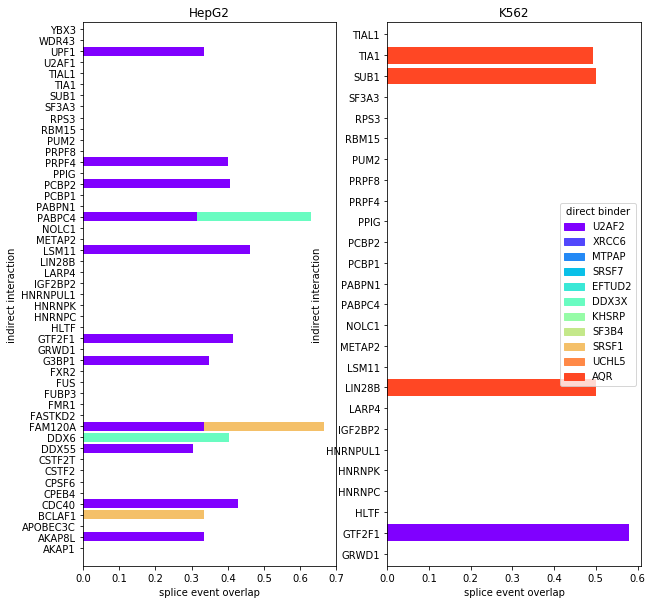

In [33]:
plot_indirect([filter_hep, filter_k562])

In [64]:
some_indirect_sets = ['UPF1', 'SUB1', 'PABPC4', 'FAM120A']
set_of_splice = {}
for indir in some_indirect_sets:
    set_of_splice[indir] = {}
    for cell_line in ['HepG2', 'K562']:
        set_of_splice[indir][cell_line] = {}
        for dir_ in direct_interactor:
            try:
                total, overlap = overlap_splice(dir_, indir, cell_line)
                set_of_splice[indir][cell_line][dir_] = overlap
                set_of_splice[indir][cell_line]['total'] = total
            except:
                set_of_splice[indir][cell_line][dir_] = set()
        
        
            

In [76]:
direct_interactor

uID
242     U2AF2
480     XRCC6
470     MTPAP
376     SRSF7
631    EFTUD2
492     DDX3X
439     KHSRP
228     SF3B4
312     SRSF1
610     UCHL5
670       AQR
Name: RBP, dtype: object

In [77]:
def dict_to_frame(indir, cell_line):
    df = pd.DataFrame(index = direct_interactor, columns = list(set_of_splice[indir][cell_line]['total']))
    for dir_ in direct_interactor:
        df.loc[dir_,list(set_of_splice[indir][cell_line][dir_])] = 1
    return(df.fillna(0))
                      


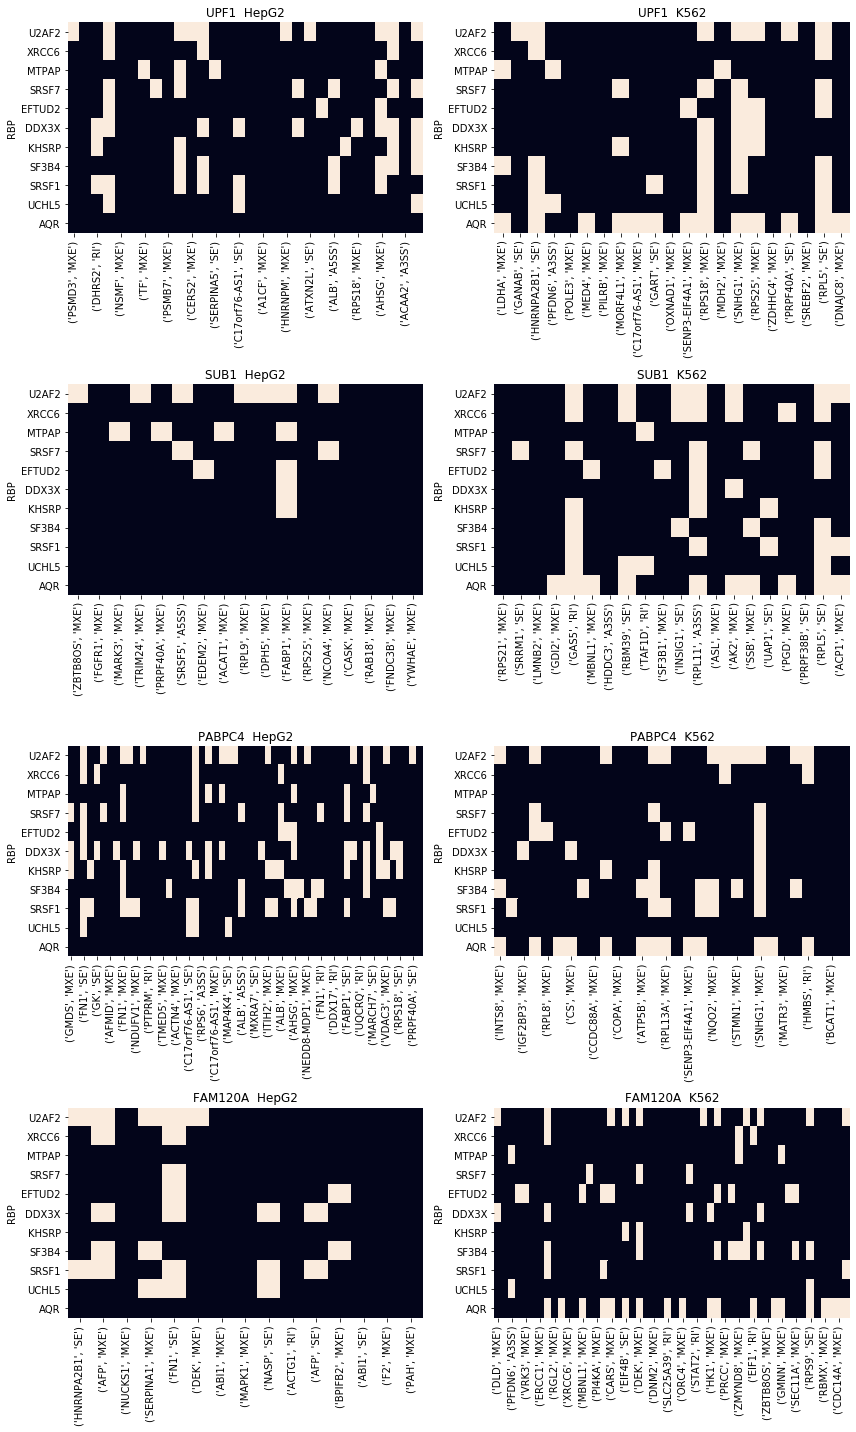

In [87]:
cell_line = ['HepG2', 'K562']
import seaborn as sns
f, ax = plt.subplots(4, 2, figsize = (12,20))
for i in range(4):
    for j in range(2):
        sns.heatmap(dict_to_frame(some_indirect_sets[i], cell_line[j]), cbar = False, ax = ax[i,j])
        ax[i,j].set_title(some_indirect_sets[i] + '  ' + cell_line[j])
plt.tight_layout()
